2025-11-11 03:44:21.369164: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-11 03:44:21.450005: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-11 03:44:22.983027: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


!!! FORCING SCRIPT TO RUN ON GPU 1 ONLY !!!
Enabled memory growth for 1 GPUs
 =================== Starting Fusion Model Data Processing =================== 
Successfully loaded '6059_rows.csv' and 'magpie_features.csv'
 =================== Step 1/5: Aligning data sources =================== 
 =================== Step 2/5: Loading 3D .npy data =================== 
Loaded 4713 3D samples and 4713 1D samples.
3D Input Shape: (16, 16, 16, 16), 1D Input Shape: 132
 =================== Step 3/5: Applying data cleaning and scaling =================== 
Original data shape: 4713
Removed 2 outliers
Final data shape after cleaning: (4711, 16, 16, 16, 16)
Data scaling complete.
 =================== Step 4/5: Creating final data splits (64/16/20) =================== 
3D Train/Val/Test sizes: (3014, 16, 16, 16, 16), (754, 16, 16, 16, 16), (943, 16, 16, 16, 16)
1D Train/Val/Test sizes: (3014, 132), (754, 132), (943, 132)
 =================== Step 5/5: Defining the Fusion Model Architecture ==========

I0000 00:00:1762812868.377101 2175509 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37442 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c0:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cnn_input           │ (None, 16, 16,    │          0 │ -                 │
│ (InputLayer)        │ 16, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ magpie_input        │ (None, 132)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 3D_CNN_Branch       │ (None, 256)       │  8,284,484 │ cnn_input[0][0]   │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1D_MLP_Branch       │ (None, 128)       │     68,480 │ magpie_input[0][… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fusion_concatenate  │ (None, 384)       │          0 │ 3D_CNN_Branch[0]… │
│ (Concatenate)       │                   │            │ 1D_MLP_Branch[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 512)       │    197,120 │ fusion_concatena… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512)       │      2,048 │ dense_10[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 512)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 256)       │    131,328 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_11[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_prediction   │ (None, 1)         │        257 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,684,741 (33.13 MB)

 Trainable params: 8,677,957 (33.10 MB)

 Non-trainable params: 6,784 (26.50 KB)


 =================== Starting Training of Fusion Model ===================
Epoch 1/300


2025-11-11 03:44:31.497360: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}
2025-11-11 03:44:48.400805: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91500


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 1.1161 - mae: 1.4661

2025-11-11 03:45:08.701201: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_16}}



Epoch 1: val_loss improved from None to 0.12551, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - loss: 1.0087 - mae: 1.3524 - val_loss: 0.1255 - val_mae: 0.2501 - learning_rate: 1.0000e-04
Epoch 2/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.8537 - mae: 1.1867
Epoch 2: val_loss did not improve from 0.12551
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - loss: 0.8223 - mae: 1.1521 - val_loss: 0.1345 - val_mae: 0.2544 - learning_rate: 1.0000e-04
Epoch 3/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.7355 - mae: 1.0572
Epoch 3: val_loss did not improve from 0.12551
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 0.7342 - mae: 1.0546 - val_loss: 0.1443 - val_mae: 0.2901 - learning_rate: 1.0000e-04
Epoch 4/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.6843 - mae: 0.9978
Epoch 4: val_loss did not improve from 0.12551
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step - loss: 0.6755 - mae: 0.9929 - val_loss: 0.1424 - val_mae: 0.2839 - learning_rate: 1.0000e-04
Epoch 5/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss:

189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.5380 - mae: 0.8384 - val_loss: 0.1175 - val_mae: 0.2155 - learning_rate: 1.0000e-04
Epoch 8/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.5134 - mae: 0.8066
Epoch 8: val_loss improved from 0.11747 to 0.10950, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - loss: 0.4866 - mae: 0.7754 - val_loss: 0.1095 - val_mae: 0.1855 - learning_rate: 1.0000e-04
Epoch 9/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4860 - mae: 0.7760
Epoch 9: val_loss improved from 0.10950 to 0.10582, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.4694 - mae: 0.7594 - val_loss: 0.1058 - val_mae: 0.1751 - learning_rate: 1.0000e-04
Epoch 10/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.4190 - mae: 0.6915
Epoch 10: val_loss did not improve from 0.10582
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.4225 - mae: 0.7003 - val_loss: 0.1177 - val_mae: 0.2251 - learning_rate: 1.0000e-04
Epoch 11/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4113 - mae: 0.6936
Epoch 11: val_loss improved from 0.10582 to 0.10350, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - loss: 0.4008 - mae: 0.6771 - val_loss: 0.1035 - val_mae: 0.1872 - learning_rate: 1.0000e-04
Epoch 12/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.3822 - mae: 0.6507
Epoch 12: val_loss improved from 0.10350 to 0.09897, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - loss: 0.3761 - mae: 0.6466 - val_loss: 0.0990 - val_mae: 0.1633 - learning_rate: 1.0000e-04
Epoch 13/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.3512 - mae: 0.6149
Epoch 13: val_loss improved from 0.09897 to 0.09801, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.3360 - mae: 0.5925 - val_loss: 0.0980 - val_mae: 0.1561 - learning_rate: 1.0000e-04
Epoch 14/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.3179 - mae: 0.5723
Epoch 14: val_loss improved from 0.09801 to 0.09195, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.3119 - mae: 0.5628 - val_loss: 0.0919 - val_mae: 0.1423 - learning_rate: 1.0000e-04
Epoch 15/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.3073 - mae: 0.5536
Epoch 15: val_loss improved from 0.09195 to 0.08953, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.2964 - mae: 0.5387 - val_loss: 0.0895 - val_mae: 0.1215 - learning_rate: 1.0000e-04
Epoch 16/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2801 - mae: 0.5246
Epoch 16: val_loss improved from 0.08953 to 0.08651, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.2705 - mae: 0.5077 - val_loss: 0.0865 - val_mae: 0.1163 - learning_rate: 1.0000e-04
Epoch 17/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.2402 - mae: 0.4591
Epoch 17: val_loss improved from 0.08651 to 0.08551, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - loss: 0.2452 - mae: 0.4663 - val_loss: 0.0855 - val_mae: 0.1134 - learning_rate: 1.0000e-04
Epoch 18/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2199 - mae: 0.4338
Epoch 18: val_loss improved from 0.08551 to 0.08258, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - loss: 0.2177 - mae: 0.4312 - val_loss: 0.0826 - val_mae: 0.0981 - learning_rate: 1.0000e-04
Epoch 19/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2135 - mae: 0.4187
Epoch 19: val_loss improved from 0.08258 to 0.07911, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.2060 - mae: 0.4073 - val_loss: 0.0791 - val_mae: 0.0793 - learning_rate: 1.0000e-04
Epoch 20/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.1873 - mae: 0.3788
Epoch 20: val_loss improved from 0.07911 to 0.07779, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - loss: 0.1824 - mae: 0.3702 - val_loss: 0.0778 - val_mae: 0.0751 - learning_rate: 1.0000e-04
Epoch 21/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1708 - mae: 0.3530
Epoch 21: val_loss improved from 0.07779 to 0.07715, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 0.1663 - mae: 0.3431 - val_loss: 0.0771 - val_mae: 0.0718 - learning_rate: 1.0000e-04
Epoch 22/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1630 - mae: 0.3377
Epoch 22: val_loss improved from 0.07715 to 0.07492, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.1573 - mae: 0.3283 - val_loss: 0.0749 - val_mae: 0.0600 - learning_rate: 1.0000e-04
Epoch 23/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1473 - mae: 0.3097
Epoch 23: val_loss improved from 0.07492 to 0.07460, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.1452 - mae: 0.3055 - val_loss: 0.0746 - val_mae: 0.0643 - learning_rate: 1.0000e-04
Epoch 24/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.1410 - mae: 0.2985
Epoch 24: val_loss improved from 0.07460 to 0.07324, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 0.1370 - mae: 0.2895 - val_loss: 0.0732 - val_mae: 0.0585 - learning_rate: 1.0000e-04
Epoch 25/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1304 - mae: 0.2742
Epoch 25: val_loss improved from 0.07324 to 0.07225, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - loss: 0.1253 - mae: 0.2621 - val_loss: 0.0722 - val_mae: 0.0564 - learning_rate: 1.0000e-04
Epoch 26/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1147 - mae: 0.2396
Epoch 26: val_loss improved from 0.07225 to 0.07152, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - loss: 0.1136 - mae: 0.2347 - val_loss: 0.0715 - val_mae: 0.0578 - learning_rate: 1.0000e-04
Epoch 27/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1113 - mae: 0.2306
Epoch 27: val_loss improved from 0.07152 to 0.07066, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.1081 - mae: 0.2230 - val_loss: 0.0707 - val_mae: 0.0576 - learning_rate: 1.0000e-04
Epoch 28/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1027 - mae: 0.2091
Epoch 28: val_loss improved from 0.07066 to 0.07014, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.1006 - mae: 0.2014 - val_loss: 0.0701 - val_mae: 0.0617 - learning_rate: 1.0000e-04
Epoch 29/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0966 - mae: 0.1940
Epoch 29: val_loss improved from 0.07014 to 0.06866, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - loss: 0.0959 - mae: 0.1921 - val_loss: 0.0687 - val_mae: 0.0536 - learning_rate: 1.0000e-04
Epoch 30/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0932 - mae: 0.1850
Epoch 30: val_loss improved from 0.06866 to 0.06796, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - loss: 0.0917 - mae: 0.1793 - val_loss: 0.0680 - val_mae: 0.0585 - learning_rate: 1.0000e-04
Epoch 31/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0896 - mae: 0.1722
Epoch 31: val_loss improved from 0.06796 to 0.06726, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.0877 - mae: 0.1682 - val_loss: 0.0673 - val_mae: 0.0626 - learning_rate: 1.0000e-04
Epoch 32/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0833 - mae: 0.1548
Epoch 32: val_loss improved from 0.06726 to 0.06587, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - loss: 0.0822 - mae: 0.1518 - val_loss: 0.0659 - val_mae: 0.0578 - learning_rate: 1.0000e-04
Epoch 33/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0796 - mae: 0.1436
Epoch 33: val_loss improved from 0.06587 to 0.06457, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - loss: 0.0791 - mae: 0.1427 - val_loss: 0.0646 - val_mae: 0.0546 - learning_rate: 1.0000e-04
Epoch 34/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0755 - mae: 0.1296
Epoch 34: val_loss improved from 0.06457 to 0.06340, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 0.0754 - mae: 0.1310 - val_loss: 0.0634 - val_mae: 0.0545 - learning_rate: 1.0000e-04
Epoch 35/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0736 - mae: 0.1260
Epoch 35: val_loss improved from 0.06340 to 0.06218, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.0731 - mae: 0.1250 - val_loss: 0.0622 - val_mae: 0.0529 - learning_rate: 1.0000e-04
Epoch 36/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0713 - mae: 0.1204
Epoch 36: val_loss improved from 0.06218 to 0.06077, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - loss: 0.0705 - mae: 0.1178 - val_loss: 0.0608 - val_mae: 0.0499 - learning_rate: 1.0000e-04
Epoch 37/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0688 - mae: 0.1130
Epoch 37: val_loss improved from 0.06077 to 0.05992, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0682 - mae: 0.1113 - val_loss: 0.0599 - val_mae: 0.0552 - learning_rate: 1.0000e-04
Epoch 38/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0656 - mae: 0.1005
Epoch 38: val_loss improved from 0.05992 to 0.05839, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - loss: 0.0653 - mae: 0.1010 - val_loss: 0.0584 - val_mae: 0.0505 - learning_rate: 1.0000e-04
Epoch 39/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0647 - mae: 0.1033
Epoch 39: val_loss improved from 0.05839 to 0.05712, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - loss: 0.0639 - mae: 0.0997 - val_loss: 0.0571 - val_mae: 0.0503 - learning_rate: 1.0000e-04
Epoch 40/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0614 - mae: 0.0898
Epoch 40: val_loss improved from 0.05712 to 0.05567, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.0611 - mae: 0.0901 - val_loss: 0.0557 - val_mae: 0.0465 - learning_rate: 1.0000e-04
Epoch 41/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0598 - mae: 0.0875
Epoch 41: val_loss improved from 0.05567 to 0.05448, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 0.0596 - mae: 0.0883 - val_loss: 0.0545 - val_mae: 0.0477 - learning_rate: 1.0000e-04
Epoch 42/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0584 - mae: 0.0863
Epoch 42: val_loss improved from 0.05448 to 0.05337, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.0580 - mae: 0.0853 - val_loss: 0.0534 - val_mae: 0.0488 - learning_rate: 1.0000e-04
Epoch 43/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0565 - mae: 0.0819
Epoch 43: val_loss improved from 0.05337 to 0.05177, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 0.0561 - mae: 0.0807 - val_loss: 0.0518 - val_mae: 0.0415 - learning_rate: 1.0000e-04
Epoch 44/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0549 - mae: 0.0787
Epoch 44: val_loss improved from 0.05177 to 0.05069, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - loss: 0.0546 - mae: 0.0778 - val_loss: 0.0507 - val_mae: 0.0433 - learning_rate: 1.0000e-04
Epoch 45/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0534 - mae: 0.0747
Epoch 45: val_loss improved from 0.05069 to 0.04955, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0530 - mae: 0.0742 - val_loss: 0.0495 - val_mae: 0.0440 - learning_rate: 1.0000e-04
Epoch 46/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0520 - mae: 0.0738
Epoch 46: val_loss improved from 0.04955 to 0.04839, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - loss: 0.0515 - mae: 0.0714 - val_loss: 0.0484 - val_mae: 0.0430 - learning_rate: 1.0000e-04
Epoch 47/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0504 - mae: 0.0688
Epoch 47: val_loss improved from 0.04839 to 0.04732, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - loss: 0.0501 - mae: 0.0681 - val_loss: 0.0473 - val_mae: 0.0431 - learning_rate: 1.0000e-04
Epoch 48/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0489 - mae: 0.0648
Epoch 48: val_loss improved from 0.04732 to 0.04615, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - loss: 0.0487 - mae: 0.0651 - val_loss: 0.0462 - val_mae: 0.0404 - learning_rate: 1.0000e-04
Epoch 49/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0477 - mae: 0.0618
Epoch 49: val_loss improved from 0.04615 to 0.04507, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - loss: 0.0475 - mae: 0.0625 - val_loss: 0.0451 - val_mae: 0.0390 - learning_rate: 1.0000e-04
Epoch 50/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0466 - mae: 0.0605
Epoch 50: val_loss improved from 0.04507 to 0.04412, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - loss: 0.0464 - mae: 0.0609 - val_loss: 0.0441 - val_mae: 0.0392 - learning_rate: 1.0000e-04
Epoch 51/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0454 - mae: 0.0582
Epoch 51: val_loss improved from 0.04412 to 0.04311, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - loss: 0.0452 - mae: 0.0587 - val_loss: 0.0431 - val_mae: 0.0372 - learning_rate: 1.0000e-04
Epoch 52/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0443 - mae: 0.0572
Epoch 52: val_loss improved from 0.04311 to 0.04205, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0441 - mae: 0.0565 - val_loss: 0.0420 - val_mae: 0.0349 - learning_rate: 1.0000e-04
Epoch 53/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0432 - mae: 0.0551
Epoch 53: val_loss improved from 0.04205 to 0.04115, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - loss: 0.0430 - mae: 0.0556 - val_loss: 0.0412 - val_mae: 0.0347 - learning_rate: 1.0000e-04
Epoch 54/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0421 - mae: 0.0522
Epoch 54: val_loss improved from 0.04115 to 0.04026, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0420 - mae: 0.0532 - val_loss: 0.0403 - val_mae: 0.0347 - learning_rate: 1.0000e-04
Epoch 55/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0412 - mae: 0.0518
Epoch 55: val_loss improved from 0.04026 to 0.03932, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0410 - mae: 0.0525 - val_loss: 0.0393 - val_mae: 0.0338 - learning_rate: 1.0000e-04
Epoch 56/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0402 - mae: 0.0509
Epoch 56: val_loss improved from 0.03932 to 0.03841, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - loss: 0.0400 - mae: 0.0509 - val_loss: 0.0384 - val_mae: 0.0337 - learning_rate: 1.0000e-04
Epoch 57/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0392 - mae: 0.0506
Epoch 57: val_loss improved from 0.03841 to 0.03745, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - loss: 0.0390 - mae: 0.0496 - val_loss: 0.0374 - val_mae: 0.0331 - learning_rate: 1.0000e-04
Epoch 58/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0381 - mae: 0.0486
Epoch 58: val_loss improved from 0.03745 to 0.03654, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 0.0380 - mae: 0.0493 - val_loss: 0.0365 - val_mae: 0.0343 - learning_rate: 1.0000e-04
Epoch 59/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0371 - mae: 0.0484
Epoch 59: val_loss improved from 0.03654 to 0.03543, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 0.0369 - mae: 0.0485 - val_loss: 0.0354 - val_mae: 0.0316 - learning_rate: 1.0000e-04
Epoch 60/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0361 - mae: 0.0468
Epoch 60: val_loss improved from 0.03543 to 0.03449, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 0.0359 - mae: 0.0471 - val_loss: 0.0345 - val_mae: 0.0334 - learning_rate: 1.0000e-04
Epoch 61/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0349 - mae: 0.0446
Epoch 61: val_loss improved from 0.03449 to 0.03337, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 0.0347 - mae: 0.0453 - val_loss: 0.0334 - val_mae: 0.0318 - learning_rate: 1.0000e-04
Epoch 62/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0338 - mae: 0.0440
Epoch 62: val_loss improved from 0.03337 to 0.03223, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0336 - mae: 0.0447 - val_loss: 0.0322 - val_mae: 0.0311 - learning_rate: 1.0000e-04
Epoch 63/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0327 - mae: 0.0440
Epoch 63: val_loss improved from 0.03223 to 0.03103, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - loss: 0.0324 - mae: 0.0441 - val_loss: 0.0310 - val_mae: 0.0292 - learning_rate: 1.0000e-04
Epoch 64/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0315 - mae: 0.0431
Epoch 64: val_loss improved from 0.03103 to 0.02987, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.0312 - mae: 0.0436 - val_loss: 0.0299 - val_mae: 0.0300 - learning_rate: 1.0000e-04
Epoch 65/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0301 - mae: 0.0405
Epoch 65: val_loss improved from 0.02987 to 0.02870, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - loss: 0.0299 - mae: 0.0415 - val_loss: 0.0287 - val_mae: 0.0307 - learning_rate: 1.0000e-04
Epoch 66/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0288 - mae: 0.0401
Epoch 66: val_loss improved from 0.02870 to 0.02734, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 0.0286 - mae: 0.0409 - val_loss: 0.0273 - val_mae: 0.0293 - learning_rate: 1.0000e-04
Epoch 67/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0275 - mae: 0.0391
Epoch 67: val_loss improved from 0.02734 to 0.02605, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - loss: 0.0272 - mae: 0.0395 - val_loss: 0.0260 - val_mae: 0.0290 - learning_rate: 1.0000e-04
Epoch 68/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0262 - mae: 0.0391
Epoch 68: val_loss improved from 0.02605 to 0.02464, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.0259 - mae: 0.0391 - val_loss: 0.0246 - val_mae: 0.0278 - learning_rate: 1.0000e-04
Epoch 69/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0247 - mae: 0.0371
Epoch 69: val_loss improved from 0.02464 to 0.02329, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - loss: 0.0245 - mae: 0.0379 - val_loss: 0.0233 - val_mae: 0.0281 - learning_rate: 1.0000e-04
Epoch 70/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0233 - mae: 0.0372
Epoch 70: val_loss improved from 0.02329 to 0.02189, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - loss: 0.0230 - mae: 0.0375 - val_loss: 0.0219 - val_mae: 0.0278 - learning_rate: 1.0000e-04
Epoch 71/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0219 - mae: 0.0367
Epoch 71: val_loss improved from 0.02189 to 0.02049, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 81ms/step - loss: 0.0216 - mae: 0.0372 - val_loss: 0.0205 - val_mae: 0.0279 - learning_rate: 1.0000e-04
Epoch 72/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0205 - mae: 0.0359
Epoch 72: val_loss improved from 0.02049 to 0.01917, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 0.0202 - mae: 0.0361 - val_loss: 0.0192 - val_mae: 0.0294 - learning_rate: 1.0000e-04
Epoch 73/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0191 - mae: 0.0360
Epoch 73: val_loss improved from 0.01917 to 0.01765, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 0.0187 - mae: 0.0359 - val_loss: 0.0177 - val_mae: 0.0280 - learning_rate: 1.0000e-04
Epoch 74/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0176 - mae: 0.0350
Epoch 74: val_loss improved from 0.01765 to 0.01624, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0173 - mae: 0.0355 - val_loss: 0.0162 - val_mae: 0.0271 - learning_rate: 1.0000e-04
Epoch 75/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0161 - mae: 0.0335
Epoch 75: val_loss improved from 0.01624 to 0.01499, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 0.0159 - mae: 0.0346 - val_loss: 0.0150 - val_mae: 0.0299 - learning_rate: 1.0000e-04
Epoch 76/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0147 - mae: 0.0331
Epoch 76: val_loss improved from 0.01499 to 0.01357, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 67ms/step - loss: 0.0145 - mae: 0.0337 - val_loss: 0.0136 - val_mae: 0.0281 - learning_rate: 1.0000e-04
Epoch 77/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0134 - mae: 0.0327
Epoch 77: val_loss improved from 0.01357 to 0.01242, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 0.0131 - mae: 0.0332 - val_loss: 0.0124 - val_mae: 0.0299 - learning_rate: 1.0000e-04
Epoch 78/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0121 - mae: 0.0324
Epoch 78: val_loss improved from 0.01242 to 0.01105, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - loss: 0.0118 - mae: 0.0329 - val_loss: 0.0111 - val_mae: 0.0282 - learning_rate: 1.0000e-04
Epoch 79/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0108 - mae: 0.0326
Epoch 79: val_loss improved from 0.01105 to 0.00989, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0106 - mae: 0.0324 - val_loss: 0.0099 - val_mae: 0.0298 - learning_rate: 1.0000e-04
Epoch 80/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0096 - mae: 0.0313
Epoch 80: val_loss improved from 0.00989 to 0.00865, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - loss: 0.0094 - mae: 0.0314 - val_loss: 0.0087 - val_mae: 0.0268 - learning_rate: 1.0000e-04
Epoch 81/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0085 - mae: 0.0304
Epoch 81: val_loss improved from 0.00865 to 0.00774, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 0.0082 - mae: 0.0308 - val_loss: 0.0077 - val_mae: 0.0302 - learning_rate: 1.0000e-04
Epoch 82/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0074 - mae: 0.0304
Epoch 82: val_loss improved from 0.00774 to 0.00671, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - loss: 0.0072 - mae: 0.0308 - val_loss: 0.0067 - val_mae: 0.0283 - learning_rate: 1.0000e-04
Epoch 83/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0065 - mae: 0.0300
Epoch 83: val_loss improved from 0.00671 to 0.00585, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - loss: 0.0063 - mae: 0.0305 - val_loss: 0.0058 - val_mae: 0.0283 - learning_rate: 1.0000e-04
Epoch 84/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0056 - mae: 0.0298
Epoch 84: val_loss improved from 0.00585 to 0.00513, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - loss: 0.0054 - mae: 0.0300 - val_loss: 0.0051 - val_mae: 0.0311 - learning_rate: 1.0000e-04
Epoch 85/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0048 - mae: 0.0298
Epoch 85: val_loss improved from 0.00513 to 0.00434, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 0.0047 - mae: 0.0300 - val_loss: 0.0043 - val_mae: 0.0283 - learning_rate: 1.0000e-04
Epoch 86/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0041 - mae: 0.0292
Epoch 86: val_loss improved from 0.00434 to 0.00376, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.0040 - mae: 0.0297 - val_loss: 0.0038 - val_mae: 0.0289 - learning_rate: 1.0000e-04
Epoch 87/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0035 - mae: 0.0290
Epoch 87: val_loss improved from 0.00376 to 0.00326, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.0034 - mae: 0.0295 - val_loss: 0.0033 - val_mae: 0.0304 - learning_rate: 1.0000e-04
Epoch 88/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0030 - mae: 0.0288
Epoch 88: val_loss improved from 0.00326 to 0.00277, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - loss: 0.0029 - mae: 0.0292 - val_loss: 0.0028 - val_mae: 0.0282 - learning_rate: 1.0000e-04
Epoch 89/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0026 - mae: 0.0283
Epoch 89: val_loss improved from 0.00277 to 0.00255, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - loss: 0.0025 - mae: 0.0287 - val_loss: 0.0026 - val_mae: 0.0320 - learning_rate: 1.0000e-04
Epoch 90/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0022 - mae: 0.0273
Epoch 90: val_loss improved from 0.00255 to 0.00211, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - loss: 0.0021 - mae: 0.0280 - val_loss: 0.0021 - val_mae: 0.0273 - learning_rate: 1.0000e-04
Epoch 91/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0019 - mae: 0.0278
Epoch 91: val_loss improved from 0.00211 to 0.00179, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 0.0018 - mae: 0.0282 - val_loss: 0.0018 - val_mae: 0.0279 - learning_rate: 1.0000e-04
Epoch 92/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0017 - mae: 0.0283
Epoch 92: val_loss improved from 0.00179 to 0.00162, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 89ms/step - loss: 0.0017 - mae: 0.0285 - val_loss: 0.0016 - val_mae: 0.0275 - learning_rate: 1.0000e-04
Epoch 93/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0014 - mae: 0.0273
Epoch 93: val_loss improved from 0.00162 to 0.00153, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0014 - mae: 0.0280 - val_loss: 0.0015 - val_mae: 0.0294 - learning_rate: 1.0000e-04
Epoch 94/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0013 - mae: 0.0275
Epoch 94: val_loss improved from 0.00153 to 0.00126, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - loss: 0.0013 - mae: 0.0278 - val_loss: 0.0013 - val_mae: 0.0263 - learning_rate: 1.0000e-04
Epoch 95/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0012 - mae: 0.0271
Epoch 95: val_loss improved from 0.00126 to 0.00118, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 0.0012 - mae: 0.0274 - val_loss: 0.0012 - val_mae: 0.0272 - learning_rate: 1.0000e-04
Epoch 96/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0010 - mae: 0.0270
Epoch 96: val_loss did not improve from 0.00118
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0011 - mae: 0.0275 - val_loss: 0.0012 - val_mae: 0.0270 - learning_rate: 1.0000e-04
Epoch 97/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 9.7354e-04 - mae: 0.0268
Epoch 97: val_loss did not improve from 0.00118
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 9.8438e-04 - mae: 0.0271 - val_loss: 0.0012 - val_mae: 0.0293 - learning_rate: 1.0000e-04
Epoch 98/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 8.9244e-04 - mae: 0.0267
Epoch 98: val_loss improved from 0.00118 to 0.00092, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - loss: 9.0521e-04 - mae: 0.0270 - val_loss: 9.2340e-04 - val_mae: 0.0262 - learning_rate: 1.0000e-04
Epoch 99/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 8.0407e-04 - mae: 0.0254
Epoch 99: val_loss did not improve from 0.00092
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 8.1380e-04 - mae: 0.0258 - val_loss: 9.8406e-04 - val_mae: 0.0288 - learning_rate: 1.0000e-04
Epoch 100/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 7.9888e-04 - mae: 0.0264
Epoch 100: val_loss did not improve from 0.00092
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - loss: 8.1405e-04 - mae: 0.0266 - val_loss: 0.0010 - val_mae: 0.0278 - learning_rate: 1.0000e-04
Epoch 101/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 7.3016e-04 - mae: 0.0255
Epoch 101: val_loss improved from 0.00092 to 0.00091, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 7.4559e-04 - mae: 0.0260 - val_loss: 9.1206e-04 - val_mae: 0.0281 - learning_rate: 1.0000e-04
Epoch 102/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.0465e-04 - mae: 0.0255
Epoch 102: val_loss improved from 0.00091 to 0.00080, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - loss: 7.0756e-04 - mae: 0.0256 - val_loss: 8.0049e-04 - val_mae: 0.0258 - learning_rate: 1.0000e-04
Epoch 103/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 6.6683e-04 - mae: 0.0252
Epoch 103: val_loss did not improve from 0.00080
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 6.7903e-04 - mae: 0.0252 - val_loss: 9.0366e-04 - val_mae: 0.0279 - learning_rate: 1.0000e-04
Epoch 104/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 6.5378e-04 - mae: 0.0254
Epoch 104: val_loss improved from 0.00080 to 0.00077, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - loss: 6.7451e-04 - mae: 0.0256 - val_loss: 7.6767e-04 - val_mae: 0.0257 - learning_rate: 1.0000e-04
Epoch 105/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 6.4375e-04 - mae: 0.0251
Epoch 105: val_loss did not improve from 0.00077
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 6.5433e-04 - mae: 0.0254 - val_loss: 8.1732e-04 - val_mae: 0.0273 - learning_rate: 1.0000e-04
Epoch 106/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 6.1924e-04 - mae: 0.0250
Epoch 106: val_loss improved from 0.00077 to 0.00076, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - loss: 6.2446e-04 - mae: 0.0250 - val_loss: 7.6481e-04 - val_mae: 0.0258 - learning_rate: 1.0000e-04
Epoch 107/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 6.1095e-04 - mae: 0.0251
Epoch 107: val_loss did not improve from 0.00076
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 6.1609e-04 - mae: 0.0250 - val_loss: 9.2884e-04 - val_mae: 0.0304 - learning_rate: 1.0000e-04
Epoch 108/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 6.0327e-04 - mae: 0.0248
Epoch 108: val_loss improved from 0.00076 to 0.00066, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - loss: 6.2162e-04 - mae: 0.0252 - val_loss: 6.5845e-04 - val_mae: 0.0232 - learning_rate: 1.0000e-04
Epoch 109/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 5.8178e-04 - mae: 0.0246
Epoch 109: val_loss did not improve from 0.00066
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 5.9027e-04 - mae: 0.0247 - val_loss: 0.0011 - val_mae: 0.0313 - learning_rate: 1.0000e-04
Epoch 110/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 5.8235e-04 - mae: 0.0248
Epoch 110: val_loss did not improve from 0.00066
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - loss: 6.0261e-04 - mae: 0.0251 - val_loss: 7.8833e-04 - val_mae: 0.0270 - learning_rate: 1.0000e-04
Epoch 111/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 5.8565e-04 - mae: 0.0247
Epoch 111: val_loss did not improve from 0.00066
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - loss: 6.0173e-04 - mae: 0.0249 - val_loss: 8.6480e-04 - val_mae: 0.0284 - learning_rate: 1.0000e-04
Epoch 112/

189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - loss: 5.4214e-04 - mae: 0.0236 - val_loss: 6.3570e-04 - val_mae: 0.0228 - learning_rate: 5.0000e-05
Epoch 130/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 4.8425e-04 - mae: 0.0228
Epoch 130: val_loss improved from 0.00064 to 0.00062, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - loss: 4.9610e-04 - mae: 0.0229 - val_loss: 6.1859e-04 - val_mae: 0.0231 - learning_rate: 5.0000e-05
Epoch 131/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 4.6456e-04 - mae: 0.0225
Epoch 131: val_loss did not improve from 0.00062
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 4.6353e-04 - mae: 0.0224 - val_loss: 6.2012e-04 - val_mae: 0.0235 - learning_rate: 5.0000e-05
Epoch 132/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4.5878e-04 - mae: 0.0228
Epoch 132: val_loss did not improve from 0.00062
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - loss: 4.5757e-04 - mae: 0.0224 - val_loss: 6.9352e-04 - val_mae: 0.0242 - learning_rate: 5.0000e-05
Epoch 133/300
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 4.2592e-04 - mae: 0.0218
Epoch 133: val_loss did not improve from 0.00062
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - loss: 4.3505e-04 - mae: 0.0219 - val_loss: 7.5342e-04 - val_mae: 0.0246 - learning_rate: 5.0000e-05
Epoch 

189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 4.3405e-04 - mae: 0.0219 - val_loss: 6.1119e-04 - val_mae: 0.0221 - learning_rate: 5.0000e-05
Epoch 139/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4.0942e-04 - mae: 0.0216
Epoch 139: val_loss improved from 0.00061 to 0.00060, saving model to To_Publish_Formation_Energy_Best.h5


189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 4.1962e-04 - mae: 0.0215 - val_loss: 6.0091e-04 - val_mae: 0.0228 - learning_rate: 5.0000e-05
Epoch 140/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 4.1502e-04 - mae: 0.0217
Epoch 140: val_loss did not improve from 0.00060
189/189 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - loss: 4.2618e-04 - mae: 0.0217 - val_loss: 7.7809e-04 - val_mae: 0.0257 - learning_rate: 5.0000e-05
Epoch 141/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 4.1827e-04 - mae: 0.0217
Epoch 141: val_loss did not improve from 0.00060
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - loss: 4.2249e-04 - mae: 0.0216 - val_loss: 8.0354e-04 - val_mae: 0.0283 - learning_rate: 5.0000e-05
Epoch 142/300
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4.2225e-04 - mae: 0.0219
Epoch 142: val_loss did not improve from 0.00060
189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step - loss: 4.1915e-04 - mae: 0.0216 - val_loss: 6.7925e-04 - val_mae: 0.0245 - learning_rate: 5.0000e-05
Epoch 

2025-11-11 04:39:50.906524: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step

 =================== FUSION MODEL FINAL RESULTS ===================
 R² Score:   0.8079
 MAE:        0.4606
 RMSE:       0.7268
Generating final plot...


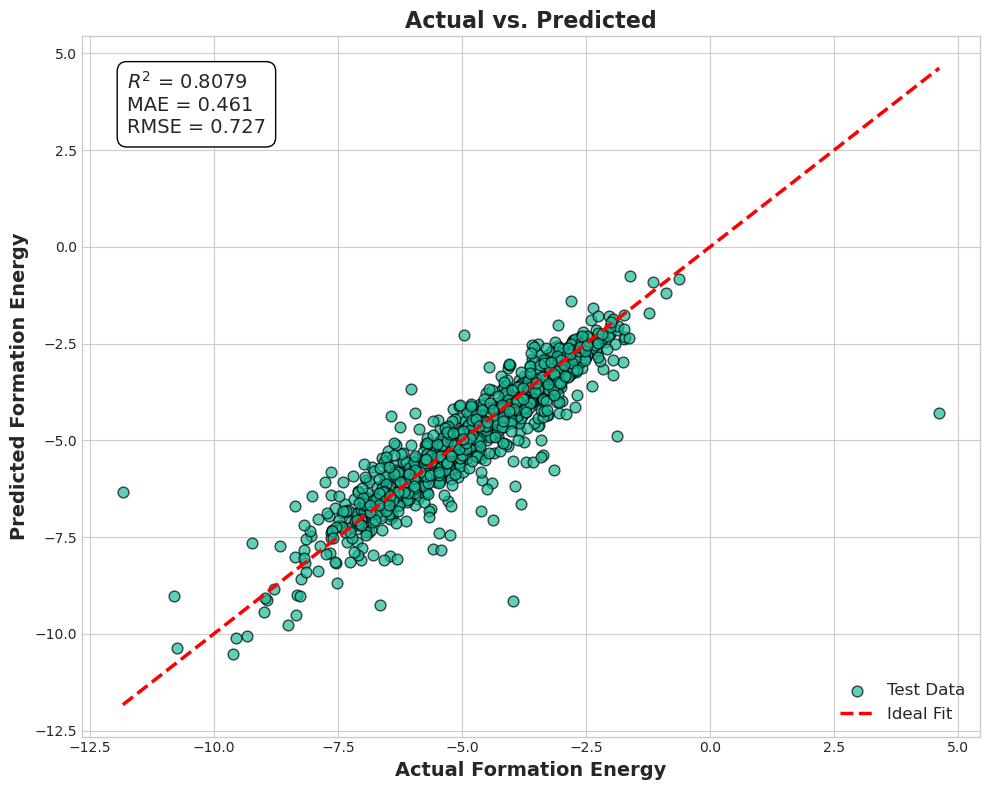

Script complete. Final model saved to 'To_Publish_Formation_Energy_Best.h5' and plot to 'To_Publish_Formation_Energy_Best.png'


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
import random
import matplotlib.pyplot as plt
import warnings
from scipy import stats

os.environ['CUDA_VISIBLE_DEVICES'] = '1' 
print("!!! FORCING SCRIPT TO RUN ON GPU 1 ONLY !!!")
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Enabled memory growth for {len(gpus)} GPUs")
    except RuntimeError as e:
        print(e)

warnings.filterwarnings('ignore')

# --- 1. ULTRA SETUP AND REPRODUCIBILITY ---
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# --- 2. DATA LOADING & PREPARATION ---
print(" =================== Starting Fusion Model Data Processing =================== ")
try:
    df_main = pd.read_csv('6059_data.csv')
    df_magpie = pd.read_csv('magpie_features.csv') 
    print("Successfully loaded '6059_rows.csv' and 'magpie_features.csv'")
except FileNotFoundError as e:
    print(f"Error: Could not find data files. {e}")
    exit()

print(" =================== Step 1/5: Aligning data sources =================== ")
df_main = df_main.dropna(subset=['formation_energy_per_atom']) 
df_aligned = pd.merge(df_main, df_magpie, on='formula_sp', how='inner')
magpie_cols = [col for col in df_magpie.columns if col != 'formula_sp']
X_magpie = df_aligned[magpie_cols].values

print(" =================== Step 2/5: Loading 3D .npy data =================== ")
X_cnn_list = []
y_list = []
input_dir = 'input_cnn'
for _, row in df_aligned.iterrows():
    file_path = os.path.join(input_dir, f"{row['formula_sp']}_latent.npy")
    if os.path.exists(file_path):
        X_cnn_list.append(np.load(file_path))
        y_list.append(row['formation_energy_per_atom']) 
    else:
        df_aligned = df_aligned.drop(row.name)

X_magpie = df_aligned[magpie_cols].values
X_cnn = np.array(X_cnn_list)
y = np.array(y_list)

print(f"Loaded {X_cnn.shape[0]} 3D samples and {X_magpie.shape[0]} 1D samples.")
INPUT_SHAPE_3D = X_cnn.shape[1:]
INPUT_SHAPE_1D = X_magpie.shape[1]
print(f"3D Input Shape: {INPUT_SHAPE_3D}, 1D Input Shape: {INPUT_SHAPE_1D}")

print(" =================== Step 3/5: Applying data cleaning and scaling =================== ")
def remove_outliers_advanced(X_cnn_in, X_magpie_in, y_in):
    print(f"Original data shape: {X_cnn_in.shape[0]}")
    Q1, Q3 = np.percentile(y_in, [10, 90]); IQR = Q3 - Q1
    mask1 = (y_in >= (Q1 - 2 * IQR)) & (y_in <= (Q3 + 2 * IQR))
    z_scores = np.abs(stats.zscore(y_in)); mask2 = z_scores < 3.5
    mask = mask1 & mask2
    print(f"Removed {len(y_in) - np.sum(mask)} outliers")
    return X_cnn_in[mask], X_magpie_in[mask], y_in[mask]

X_cnn, X_magpie, y = remove_outliers_advanced(X_cnn, X_magpie, y)
print(f"Final data shape after cleaning: {X_cnn.shape}")

X_cnn_scaled = X_cnn / np.max(X_cnn) if np.max(X_cnn) != 0 else X_cnn
scaler_magpie = StandardScaler()
X_magpie_scaled = scaler_magpie.fit_transform(X_magpie)
scaler_y = MinMaxScaler()  
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
print("Data scaling complete.")

print(" =================== Step 4/5: Creating final data splits (64/16/20) =================== ")
X_cnn_train_val, X_cnn_test, X_magpie_train_val, X_magpie_test, y_train_val, y_test = train_test_split(
    X_cnn_scaled, X_magpie_scaled, y_scaled, test_size=0.2, random_state=seed_value
)

X_cnn_train, X_cnn_val, X_magpie_train, X_magpie_val, y_train, y_val = train_test_split(
    X_cnn_train_val, X_magpie_train_val, y_train_val, test_size=0.2, random_state=seed_value
)

print(f"3D Train/Val/Test sizes: {X_cnn_train.shape}, {X_cnn_val.shape}, {X_cnn_test.shape}")
print(f"1D Train/Val/Test sizes: {X_magpie_train.shape}, {X_magpie_val.shape}, {X_magpie_test.shape}")

# --- 5. DEFINE THE FUSION MODEL ARCHITECTURE ---
print(" =================== Step 5/5: Defining the Fusion Model Architecture =================== ")

@tf.keras.utils.register_keras_serializable()
class DualAttention3D(layers.Layer):
    """ Custom Dual-Attention (Channel + Spatial) Layer """
    def __init__(self, reduction_ratio=16, **kwargs):
        super(DualAttention3D, self).__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        self.channels = input_shape[-1]; self.global_avg_pool=layers.GlobalAveragePooling3D(); self.global_max_pool=layers.GlobalMaxPooling3D()
        self.dense1=layers.Dense(units=max(self.channels // self.reduction_ratio, 8), activation='relu'); self.dense2=layers.Dense(units=self.channels, activation='sigmoid')
        self.conv1=layers.Conv3D(2, 3, padding='same', activation='relu'); self.conv2=layers.Conv3D(1, 3, padding='same', activation='sigmoid')
        super(DualAttention3D, self).build(input_shape)

    def call(self, inputs):
        avg_pool=self.global_avg_pool(inputs); max_pool=self.global_max_pool(inputs)
        avg_pool=layers.Reshape((1,1,1,self.channels))(avg_pool); max_pool=layers.Reshape((1,1,1,self.channels))(max_pool)
        channel_avg=self.dense2(self.dense1(avg_pool)); channel_max=self.dense2(self.dense1(max_pool)); channel_attention=layers.Add()([channel_avg, channel_max])
        x=layers.Multiply()([inputs, channel_attention]); spatial_avg=tf.reduce_mean(x, axis=-1, keepdims=True); spatial_max=tf.reduce_max(x, axis=-1, keepdims=True)
        spatial_concat=tf.concat([spatial_avg, spatial_max], axis=-1); spatial_attention=self.conv2(self.conv1(spatial_concat))
        output=layers.Multiply()([x, spatial_attention]); return output
    
    def get_config(self):
        config = super(DualAttention3D, self).get_config()
        config.update({"reduction_ratio": self.reduction_ratio})
        return config

def create_ultra_deep_resnet_3d(input_shape):
    """This is the 'Ultra Deep ResNet' from your proper shear model"""
    inputs = layers.Input(shape=input_shape)
    
    x = layers.Conv3D(64, 3, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x); x = layers.Activation('swish')(x); x = layers.MaxPooling3D(2)(x)
    
    for filters in [64, 128, 256]:
        shortcut=x; x=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x); x=layers.BatchNormalization()(x); x=layers.Activation('swish')(x)
        x=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x); x=layers.BatchNormalization()(x); x = DualAttention3D()(x) # Attention
        if shortcut.shape[-1] != filters: shortcut=layers.Conv3D(filters, 1, padding='same')(shortcut); shortcut=layers.BatchNormalization()(shortcut)
        x=layers.Add()([x, shortcut]); x=layers.Activation('swish')(x) # Residual
        
        shortcut=x; x=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x); x=layers.BatchNormalization()(x); x=layers.Activation('swish')(x)
        x=layers.Conv3D(filters, 3, padding='same', kernel_initializer='he_normal')(x); x=layers.BatchNormalization()(x); x=layers.Add()([x, shortcut]); x=layers.Activation('swish')(x) # Second Residual

    x = DualAttention3D()(x) # Final Attention
    x = layers.GlobalAveragePooling3D()(x)
    
    model = Model(inputs, x, name="3D_CNN_Branch")
    return model

def create_1d_mlp(input_shape):
    """This is the 1D MLP for Magpie features"""
    inputs = layers.Input(shape=input_shape)
    
    x = layers.Dense(256, activation='swish')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(128, activation='swish')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    model = Model(inputs, x, name="1D_MLP_Branch")
    return model

def create_fusion_model(cnn_input_shape, mlp_input_shape):
    input_cnn = layers.Input(shape=cnn_input_shape, name="cnn_input")
    input_magpie = layers.Input(shape=mlp_input_shape, name="magpie_input")
    
    cnn_branch = create_ultra_deep_resnet_3d(cnn_input_shape)
    mlp_branch = create_1d_mlp(mlp_input_shape)
    
    cnn_features = cnn_branch(input_cnn)
    mlp_features = mlp_branch(input_magpie)
    
    combined_features = layers.Concatenate(name="fusion_concatenate")([cnn_features, mlp_features])
    
    x = layers.Dense(512, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(combined_features)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    outputs = layers.Dense(1, activation='linear', name="output_prediction")(x)
    
    model = Model(inputs=[input_cnn, input_magpie], outputs=outputs)
    
    model.compile(
        optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-4),
        loss='huber',
        metrics=['mae']
    )
    
    return model

# --- 6. CREATE AND TRAIN THE FUSION MODEL ---
fusion_model = create_fusion_model(INPUT_SHAPE_3D, (INPUT_SHAPE_1D,))
fusion_model.summary()

train_inputs = [X_cnn_train, X_magpie_train]
val_inputs = [X_cnn_val, X_magpie_val]
test_inputs = [X_cnn_test, X_magpie_test]

callbacks = [
    EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-7, verbose=1),
    ModelCheckpoint(
        'To_Publish_Formation_Energy_Best.h5', 
        monitor='val_loss', 
        save_best_only=True, 
        verbose=1
    )
]

print("\n =================== Starting Training of Fusion Model ===================")
history = fusion_model.fit(
    train_inputs, y_train,
    validation_data=(val_inputs, y_val),
    epochs=300,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# --- 7. EVALUATE THE FUSION MODEL ---
print("\n =================== Evaluating Fusion Model ===================")
print(" =================== Loading best saved model weights =================== ")
fusion_model.load_weights('To_Publish_Formation_Energy_Best.h5')

y_pred_scaled = fusion_model.predict(test_inputs).flatten()

# Inverse transform to original scale
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_orig = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

r2 = r2_score(y_test_orig, y_pred_orig)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))

print("\n" + "="*60); 
print(" =================== FUSION MODEL FINAL RESULTS ==================="); 
print("="*60)
print(f" R² Score:   {r2:.4f}"); 
print(f" MAE:        {mae:.4f}"); 
print(f" RMSE:       {rmse:.4f}")
print("="*60)

# --- 8. VISUALIZATION ---
print("Generating final plot...")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

plt.scatter(y_test_orig, y_pred_orig, alpha=0.7, edgecolors='k', c='#1abc9c', s=60, label="Test Data")
ideal_line = [min(y_test_orig.min(), y_pred_orig.min()), max(y_test_orig.max(), y_pred_orig.max())]
plt.plot(ideal_line, ideal_line, 'r--', lw=2.5, label="Ideal Fit")

metrics_text = (
    fr'$R^2$ = {r2:.4f}' + '\n' +
    fr'MAE = {mae:.3f}' + '\n' +
    fr'RMSE = {rmse:.3f}'
)
plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='left',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.xlabel("Actual Formation Energy", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Formation Energy", fontsize=14, fontweight='bold')
plt.title(r'Actual vs. Predicted', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
plt.savefig("To_Publish_Formation_Energy_Best.png", dpi=300)
plt.show()

print("Script complete. Final model saved to 'To_Publish_Formation_Energy_Best.h5' and plot to 'To_Publish_Formation_Energy_Best.png'")